# MC作业1

## 杜炳毅 SQT2100703054

In [1]:
import numpy as np
from numba import njit, prange
import matplotlib.pyplot as plt

In [2]:
@njit(nogil=True, parallel=True)
def buffon_needle(n,l,a):
    np.random.seed(1)
    true_num = 0
    
    for i in prange(n):
        x = np.random.rand()*a
        theta = np.random.rand()*np.pi
        if(x<=l*np.sin(theta)):
            true_num+=1
    
    return 2*l/(a*(true_num+np.finfo(np.float64).eps)/n)

In [243]:
%%time
list_n = [10**i for i in range(1,10)]
list_re = []
list_err = []

for i in list_n:
    list_re.append(buffon_needle(i,0.4,0.5))
    list_err.append(np.abs(list_re[-1]-np.pi)/np.pi)

Wall time: 9.48 s


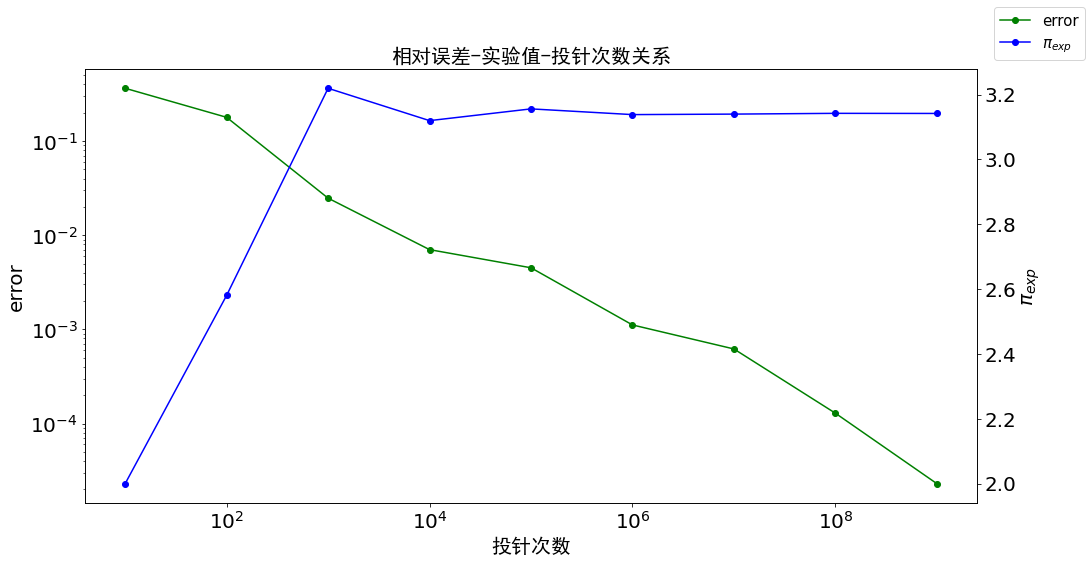

In [244]:
fig, ax1 =plt.subplots(figsize=(16,8))
ax1.plot(list_n, list_err,"go-")
ax1.set_ylabel("error", fontsize=20)
ax1.set_xlabel("投针次数", fontproperties="SimHei", fontsize=20)
ax1.set_title("相对误差-实验值-投针次数关系", fontproperties="SimHei", fontsize=20)
plt.tick_params(labelsize=20)
plt.xscale("log")
plt.yscale("log")

ax2 = ax1.twinx()
ax2.plot(list_n, list_re,"bo-")
ax2.set_ylabel(r'$\pi_{exp}$', fontsize=20)
plt.tick_params(labelsize=20)

fig.legend(["error", r'$\pi_{exp}$'], fontsize=15)
plt.show()

大概看出，投针次数每提升两个量级，误差减小一个数量级，符合中心极限定理：$\sigma = \frac{\sigma_0}{\sqrt{n}}$

In [4]:
%%time
exp_n = 100
power_n = 7
list_exp_n = np.arange(0,exp_n,1)
list_n = [10**i for i in range(1,power_n+1)]
list_pi = np.zeros([power_n,exp_n])
list_err = np.zeros([power_n,exp_n])

for i,n in enumerate(list_n):
    for j in list_exp_n:
        list_pi[i,j] = buffon_needle(n,0.4,0.5)
        list_err[i,j] = np.abs(list_pi[i,j]-np.pi)/np.pi

Wall time: 17.1 s


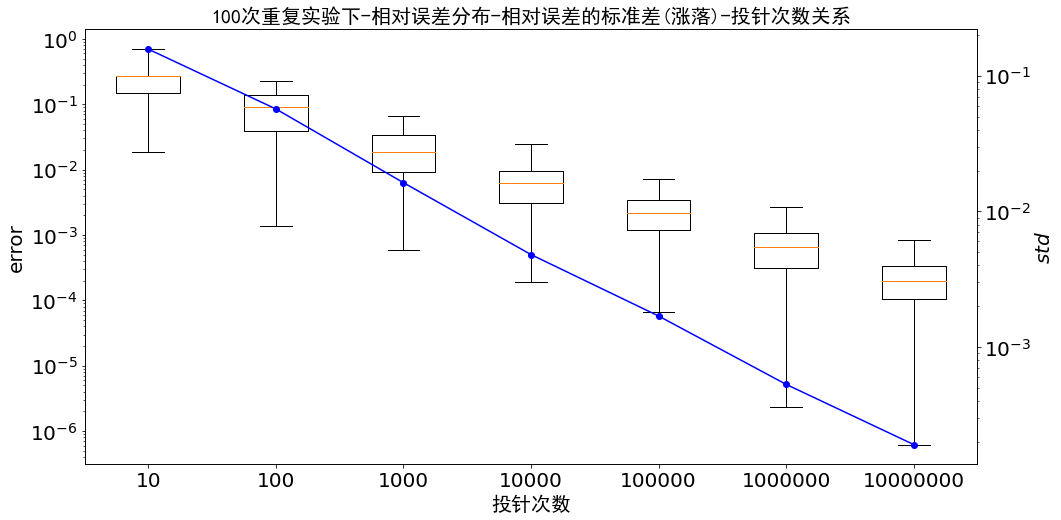

In [5]:
fig, ax1 =plt.subplots(figsize=(16,8))
ax1.boxplot(list_err.T, labels=list_n, sym='o', whis=15.5)
ax1.tick_params(labelsize=20)
ax1.set_ylabel("error", fontsize=20)
ax1.set_xlabel("投针次数", fontproperties="SimHei", fontsize=20)
ax1.set_title("100次重复实验下-相对误差分布-相对误差的标准差(涨落)-投针次数关系", fontproperties="SimHei", fontsize=20)
plt.yscale("log")

ax2 = ax1.twinx()
ax2.plot(np.arange(1,8,1), np.std(list_err,axis=1),"bo-")
ax2.set_ylabel(r'$std$', fontsize=20)
plt.tick_params(labelsize=20)
plt.yscale("log")

plt.show()

可见，投针次数每提高一个数量级，相对误差的标准差降低一个数量级，
相对误差的标准差即样本标准差的标准差，同样符合中心极限定理